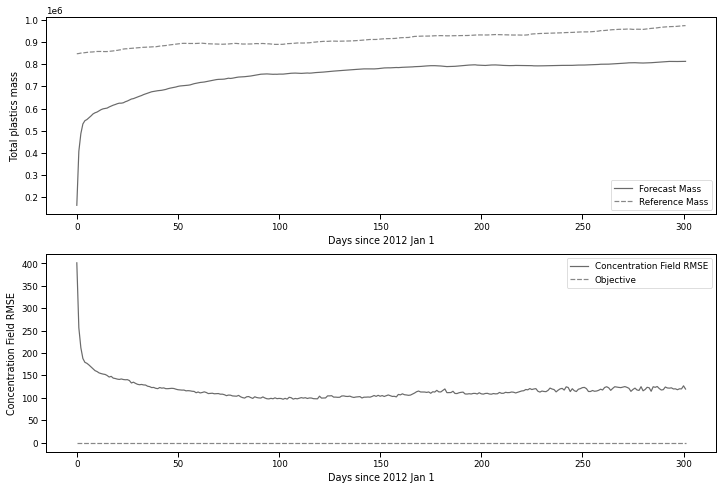

In [23]:
# Figure 7

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,8))

df = pd.read_csv("../outputs/output_self_assimilation_gpgp/log.csv")
df = df[['weights_sum', 'weights_ref_sum', 'densities_rmse']]

weights_sums_df = pd.DataFrame(
    {"Forecast Mass": df.weights_sum, "Reference Mass": df.weights_ref_sum}
)
sns.lineplot(data=weights_sums_df, ax=ax1, palette=sns.color_palette(n_colors=2, desat=False))
ax1.set_xlabel("Days since 2012 Jan 1")
ax1.set_ylabel("Total plastics mass")

rmse_df = pd.DataFrame(
    {"Concentration Field RMSE": df.densities_rmse, "Objective": df.densities_rmse * 0}
)
sns.lineplot(data=rmse_df, ax=ax2, palette=sns.color_palette(n_colors=2, desat=False))
ax2.set_xlabel("Days since 2012 Jan 1")
ax2.set_ylabel("Concentration Field RMSE")

fig.savefig("Fig7.png")

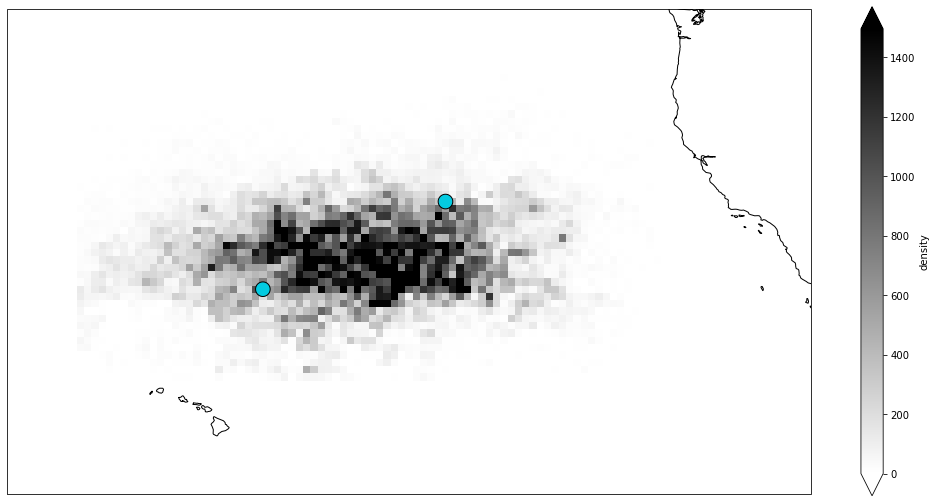

In [1]:
# Figure 8

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy as cart
import seaborn as sns
from shapely.geometry import Polygon, Point

OBSERVATION_LOCATIONS = [(25, 12), (50, 24)]
OBSERVATION_LOCATIONS = [(195 - 360 + 0.5 * loc[0], 23 + 0.5 * loc[1]) for loc in OBSERVATION_LOCATIONS]

ds_ref = xr.open_dataset("../data/data_self_assimilation_gpgp/densities_ref_self_assimilation_gpgp.nc")
ds_assimilated = xr.open_dataset("../data/data_self_assimilation_gpgp/densities_ensemble_self_assimilation_gpgp.nc")
ds_not_assimilated = xr.open_dataset("../data/data_self_assimilation_gpgp/densities_ensemble_self_assimilation_gpgp_init.nc")

assimilated_differences_ensembles = ds_assimilated.density - ds_not_assimilated.density
assimilated_differences_end = assimilated_differences_ensembles.mean(dim="ensemble").isel(time=360)
assimilated_differences_end['lon'] = 195 + (assimilated_differences_end.lon * 0.5)
assimilated_differences_end['lat'] = 23 + (assimilated_differences_end.lat * 0.5)

assimilated_forecast = ds_assimilated.density.mean(dim="ensemble").isel(time=360)
assimilated_forecast['lon'] = 195 + (assimilated_forecast.lon * 0.5)
assimilated_forecast['lat'] = 23 + (assimilated_forecast.lat * 0.5)

fig, axes = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(18,9))
axes.coastlines()

colors = mpl.colors.LinearSegmentedColormap.from_list("test", ["#00000000", "#000000FF"])

p1 = assimilated_differences_end.transpose().plot(ax=axes, transform=ccrs.PlateCarree(), robust=True, cmap=colors)
p1.axes.set_extent([190, 245, 15, 45])
p1.axes.add_geometries([Point([loc[0], loc[1]]).buffer(0.5) for loc in OBSERVATION_LOCATIONS], ccrs.PlateCarree(), facecolor='#04cbe1', edgecolor='k')
fig.savefig("Fig8.png")